In [ ]:
# for index, row in df_reg.iterrows():
#     # Accede a los valores de cada columna por fila
#     hora = row['hr']
#     fecha = row['dteday']
#     registered_value = 'registered'

#     # Luego, puedes pasar estas variables como parámetros a tu función
#     datos_con_outliers_imputados = imputar_outliers_por_fecha_y_hora(df2011, hora, registered_value,fecha)

In [ ]:
# for index, row in df_casual.iterrows():
#     # Accede a los valores de cada columna por fila
#     hora = row['hr']
#     fecha = row['dteday']
#     casual_value = 'casual'

In [ ]:
from scipy.stats import kruskal

# Dividir los datos en grupos según la estación
grupo2 = df2011[df2011['season'] == 2]['season']
grupo3 = df2011[df2011['season'] == 3]['season']

# Realizar la prueba de Kruskal-Wallis
estadistico, p_valor = kruskal(grupo2, grupo3)

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre las estaciones primavera y verano.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas entre las estaciones primavera y verano.

# Imprimir resultados
print(f"Estadístico de prueba de Kruskal-Wallis: { estadistico} Valor p:{p_valor}")

# Interpretar el resultado
if p_valor < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre las estaciones primavera y verano")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre las estaciones primavera y verano")

El gráfico de radar necesita como parametros, los ángulos en base a la cantidad de valores que deseemos agregar. Los ángulos deben de ser en radianes.

In [ ]:
from math import pi
import matplotlib.pyplot as plt

meses2 = [3,2,1,12,12,11,10,9,9,8,7,6,6,5,4,3]

N = len(meses2)

angulos = [n / float(N) * 2 * pi for n in range(N)]

print('meses', meses2)
print('num_meses', len(meses2))
print('angulos', angulos)
print('num_angulos', len(angulos))
print(np.degrees(angulos))

In [ ]:
valores += valores[:1]
angulos += angulos[:1]
print(len(angulos))
print(len(valores))

In [ ]:
# plt.polar(angulos2, valores, color='g')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8),
                       subplot_kw=dict(polar=True))

plt.xticks(angulos[:-1], meses2, color='grey', size=12)

ax.plot(angulos, valores,linewidth=1, linestyle='solid' )
ax.fill(angulos,valores, 'skyblue',alpha=0.4)

plt.title('intentamos')

In [ ]:
from scipy.interpolate import interp1d
from matplotlib.lines import Line2D


test = df2011.groupby('season')['cnt'].mean().reset_index()
season = [1,2,3,4]

valores = [cant for cant in test["cnt"]]
N = len(season)

angulos = [n / float(N) * 2 * np.pi for n in range(N)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10),
                       subplot_kw=dict(polar=True))

plt.xticks(angulos, season, color='grey', size=12)

legend_lines = [] 
season2 = ['Invierno','Primavera','Verano','Otoño']
colores = ['blue', 'green', 'yellow', 'orange']
x = ['left','right', 'right', 'left']
r = [-50, 53, 133, 230]

# Agregar el primer ángulo al final para cerrar el círculo
angulos += [angulos[0]]

for i in range(N):
    start_angle = angulos[i]
    end_angle = angulos[i + 1]

    # Asegurar que el ángulo final no sea menor que el ángulo inicial para la última estación
    if end_angle < start_angle:
        end_angle += 2 * np.pi

    # Interpolación para suavizar las líneas
    interp_points = 100  # Número de puntos para la interpolación
    interp_angles = np.linspace(start_angle, end_angle, interp_points)
    interp_values = np.linspace(valores[i], valores[i], interp_points)

    # Graficar la línea suavizada
    # ax.plot(interp_angles, interp_values, linewidth=1, linestyle='solid', color=colores[i], solid_capstyle='round')

    # Rellenar el área bajo la curva
    ax.fill_between(interp_angles, 0, interp_values, color=colores[i], alpha=0.4)

        # Graficar la línea suavizada
    line, = plt.plot(interp_angles, interp_values, linewidth=1, linestyle='solid', color=colores[i], solid_capstyle='round')

    legend_lines.append(Line2D([0], [0], color=colores[i], linewidth=1, linestyle='solid'))
    # # Etiquetas en las diagonales
    angle_mid = (start_angle + end_angle) / 2
    ax.text(angle_mid, max(valores), f" {season2[i]}", ha=x[i], va='center', rotation=r[i], fontsize='medium')

plt.legend(legend_lines, [f'{s}' for s in season2], loc='best', bbox_to_anchor=(1.10, 1.05), fontsize='medium', shadow=True)

plt.title('Promedio de uso de bicicletas por estación del año', fontsize='15', fontweight='15', loc='left');


****

1. **Desviación estándar dentro del RIC:**
Esto podría indicar que la mayor parte de la variabilidad en los datos se encuentra dentro de la mitad central de la distribución.

2. **Desviación estándar fuera del RIC:**
Esto podría indicar que hay valores extremos o una mayor variabilidad en general, más allá de la mitad central de los datos.

3. **Desviación estándar cruzando el RIC:**
Esto podría indicar una distribución asimétrica o una presencia significativa de valores atípicos.

****

PRUEBA DE FUNCIONES DE ANALISIS UNIVARIANTE


In [21]:
import pandas as pd
import numpy as np

minidataframe = pd.DataFrame({
        'categorico': ['martina','martina','martina','pepe','sebastian','sebastian'],
        'numerico_discreto' : [15,30,25,34,56,90],
        'numerico_continuo': [1.65,1.80,1.70,1.60,1.78,2.00]      
    })

minidataframe.numerico_continuo.dtypes == 'float64'

True

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def analisis_univariante(df):
    
     for columna in df.columns:
        plt.figure(figsize=(8, 5))  # Tamaño de la figura
        
        if df[columna].dtypes == 'float64':
            
            # Calcular medidas estadísticas
            media = df[columna].mean()
            mediana = df[columna].median()
            moda = df[columna].mode().iloc[0] 
            std = df[columna].std()
            percentilbajo, percentilalto = df[columna].quantile([0.25,0.75])
            
            sns.histplot(df[columna])
            
            # # Marcar la media con una línea vertical y una anotación
            plt.axvline(media, color='red', linestyle='dashdot', linewidth=2, label=f'Media: {media:.2f}')
            # plt.text(media, 0.02, f'Media: {media:.2f}', color='red', ha='center', va='bottom')

            # # Marcar la mediana con una línea vertical y una anotación
            plt.axvline(mediana, color='green', linestyle='dashdot', linewidth=2, label=f'Mediana: {mediana:.2f}')
            # plt.text(mediana, 0.02, f'Mediana: {mediana:.2f}', color='green', ha='center', va='bottom') SE VE HORRIBLE

            # # Marcar la moda con una línea vertical y una anotación
            plt.axvline(moda, color='violet', linestyle='solid', linewidth=2, label=f'Moda: {moda:.2f}')
            # plt.text(moda, 0.02, f'Moda: {moda:.2f}', color='blue', ha='center', va='bottom')

            plt.axvline(media + std, color='black', linestyle='dotted', linewidth=2, label=f'std: {std:.2f}')
            plt.axvline(media - std, color='black', linestyle='dotted', linewidth=2, label=f'std: {std:.2f}')
            
            plt.axvline(percentilbajo, color='yellow', linestyle='solid', linewidth=2, label=f'Q-25: {percentilbajo:.2f}')
            
            plt.axvline(percentilalto, color='yellow', linestyle='solid', linewidth=2, label=f'Q-75: {percentilalto:.2f}')
            
            plt.legend()
          

            print('****' * 30)
            print(f'Estadística Descriptiva\nMedia: {media} - Mediana: {mediana} - Moda: {moda} - Std: {round(std,3)} - Q1: {round(percentilbajo,3)} - Q3: {round(percentilalto,3)} ')
            print('****' * 30)
          
        elif df[columna].dtypes == 'int64':
            
            media = df[columna].mean()
            asimetria = df[columna].skew()
            curtosis = df[columna].kurt()
            
            sns.histplot(data=df[columna], kde=True)
            
            # plt.axvline(media, color='red', linestyle='dashdot', linewidth=2, label=f'Media: {media:.2f}')
            # plt.axvline(media + asimetria, color='yellow', linestyle='solid', linewidth=2, label=f'Asimetría: {asimetria:.2f}')
            # plt.axvline(media + curtosis, color='yellow', linestyle='solid', linewidth=2, label=f'curtosis: {curtosis:.2f}')
            
            plt.legend()
            
            print('****' * 20)
            print(f'Estadística Descriptiva\nCurtosis: {round(curtosis,3)} - Asimetría: {round(asimetria,3)} - Cantidad: {df[columna].describe().iloc[0]} - Media: {round(df[columna].describe().iloc[1],3)} - Std: {round(df[columna].describe().iloc[2],3)}\nIQR:\n{df[columna].describe().iloc[3:]} ')
            print('****' * 20)     
                  
        elif df[columna].dtypes == object:
            sns.histplot(df[columna])
            
            print('****' * 20)
            print(f'Estadística Descriptiva\n{df[columna].describe()} ')
            print('****' * 20)
            
        # Configuraciones generales del gráfico
        plt.title(f'Análisis Univariante de {columna}')
        plt.xlabel(columna)
        plt.ylabel('count')
        plt.show()

# todo esto a un archivo.py 

********************************************************************************
Estadística Descriptiva
count           6
unique          3
top       martina
freq            3
Name: categorico, dtype: object 
********************************************************************************


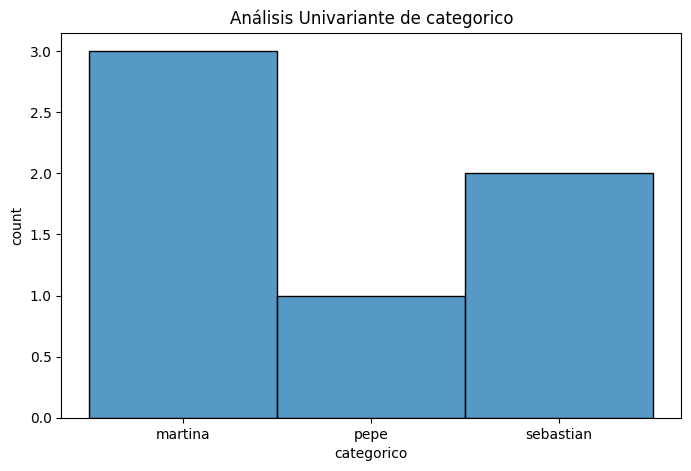

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


********************************************************************************
Estadística Descriptiva
Curtosis: 1.448 - Asimetría: 1.331 - Cantidad: 6.0 - Media: 41.667 - Std: 27.296
IQR:
min    15.00
25%    26.25
50%    32.00
75%    50.50
max    90.00
Name: numerico_discreto, dtype: float64 
********************************************************************************


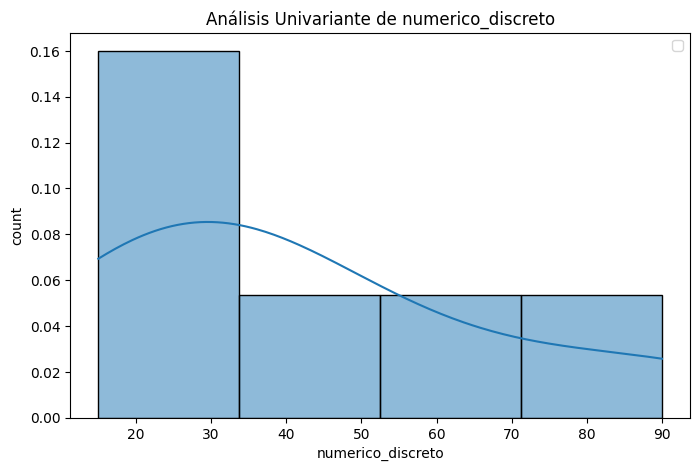

************************************************************************************************************************
Estadística Descriptiva
Media: 1.755 - Mediana: 1.74 - Moda: 1.6 - Std: 0.142 - Q1: 1.662 - Q3: 1.795 
************************************************************************************************************************


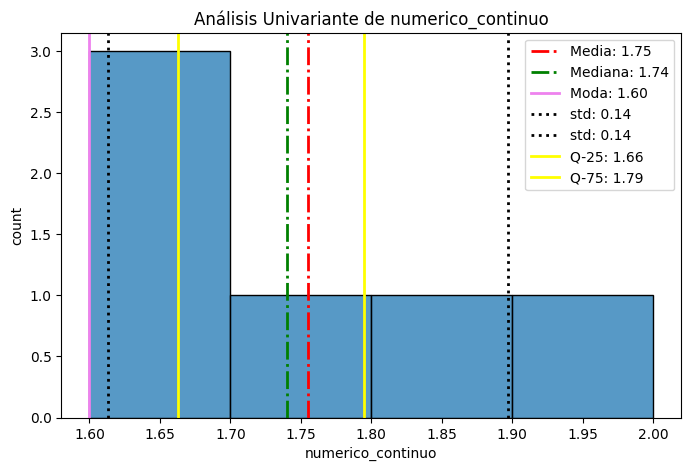

In [36]:
analisis_univariante(minidataframe)

******
******


Densidad (en el contexto de KDE - Kernel Density Estimation):

La densidad se refiere a la cantidad de "algo" en una unidad de espacio. En el análisis de datos, la densidad se utiliza para describir cómo se distribuyen los valores de una variable continua a lo largo de su rango.

En el contexto de KDE (Kernel Density Estimation), se trata de una técnica para estimar la función de densidad de probabilidad de una variable continua. En lugar de mostrar puntos de datos individuales, KDE suaviza la distribución alrededor de esos puntos, proporcionando una representación continua de la densidad de probabilidad.

Ejemplo sencillo:

Supongamos que tienes un conjunto de datos que representa las alturas de un grupo de personas. Cada punto en tu conjunto de datos sería la altura de una persona en particular.

*****


¿Qué diferencia hay entre la temperatura y la sensación térmica?
Dicho de una manera sencilla, la temperatura es el grado de calor o de frío oficial en la atmósfera, mientras que la sensación térmica es el grado de calor o de frío que los cuerpos experimentarán en dicha atmósfera debido a factores meteorológicos determinados.

*****

In [ ]:
# df2011.select_dtypes(exclude=['object']).corr()

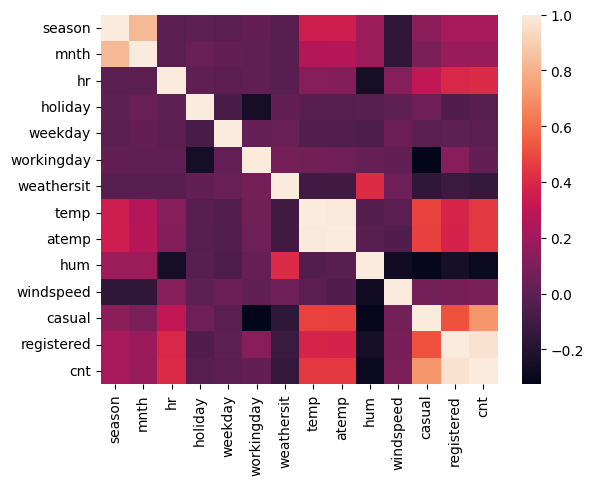

In [ ]:
# sns.heatmap(df2011.select_dtypes(exclude=['object']).corr())
# # df2011.drop(columns = df2011.describe(include='object')).corr()
# plt.show()